In [8]:
import pandas as pd


In [9]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# 1. Load Data

path = "/content/drive/MyDrive/Uas_Deep_Learning/youtube_comments_pc3.csv"


df = pd.read_csv(path)


df.head(20)



,author,comment,likes,published_at
0,@BangJago-w8o,Semangat bang,0,2025-12-21T10:16:54Z
1,@sulastrisulastri9945,"Empati,perjuangan dan pengorbanan ferry irwan...",0,2025-12-21T04:20:36Z
2,@sulastrisulastri9945,Astaghfirullah..bensin 5 liter 1 juta.sudah ko...,0,2025-12-21T04:14:33Z
3,@DheenaDhe,Masya Allah Mas Fery Afandi Aku hanya bisa ban...,0,2025-12-21T02:32:27Z
4,@fath22yyyy,"ya alloh... angkat semua kesulitannya, aamiin...",0,2025-12-21T00:22:24Z
5,@muhamadilham3804,gw ga kebayang gmn rasanya ketika udah ada di ...,1,2025-12-20T14:56:14Z
6,@KarsimalfaroKarsimalfaro,Lihatlah matamu parapejabat saudarakita yg ken...,0,2025-12-20T09:54:51Z
7,@legends4605,"berat bgt kerjanya, semoga semua diberi Allah ...",0,2025-12-20T09:54:28Z
8,@tutadivokalisomangsayang,Semoga mas Fery dan kru sehat selalu,0,2025-12-20T09:35:17Z
9,@JalalLudin-s8h,Gue aki2 aki2 banget mks mas irwadi anda pelop...,0,2025-12-20T06:52:03Z


In [11]:
#Check jumlah data


df = df.dropna()
len(df)


5644

In [12]:
# Preprocessing Data

import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_comment'] = df['comment'].apply(clean_text)
df[['comment', 'clean_comment']].head(10)


,comment,clean_comment
0,Semangat bang,semangat bang
1,"Empati,perjuangan dan pengorbanan ferry irwan...",empatiperjuangan dan pengorbanan ferry irwandi...
2,Astaghfirullah..bensin 5 liter 1 juta.sudah ko...,astaghfirullahbensin liter jutasudah kondisi s...
3,Masya Allah Mas Fery Afandi Aku hanya bisa ban...,masya allah mas fery afandi aku hanya bisa ban...
4,"ya alloh... angkat semua kesulitannya, aamiin...",ya alloh angkat semua kesulitannya aamiin
5,gw ga kebayang gmn rasanya ketika udah ada di ...,gw ga kebayang gmn rasanya ketika udah ada di ...
6,Lihatlah matamu parapejabat saudarakita yg ken...,lihatlah matamu parapejabat saudarakita yg ken...
7,"berat bgt kerjanya, semoga semua diberi Allah ...",berat bgt kerjanya semoga semua diberi allah k...
8,Semoga mas Fery dan kru sehat selalu,semoga mas fery dan kru sehat selalu
9,Gue aki2 aki2 banget mks mas irwadi anda pelop...,gue aki aki banget mks mas irwadi anda pelopor...


In [13]:
# Labelling

positive_words = [
    'bagus', 'mantap', 'keren', 'hebat', 'terima kasih',
    'suka', 'baik', 'luar biasa', 'amin', 'sehat'
]

negative_words = [
    'jelek', 'buruk', 'kecewa', 'parah', 'benci',
    'sedih', 'marah', 'kejam', 'sakit'
]




In [14]:
def label_sentiment(text):
    pos_count = 0
    neg_count = 0

    text = text.lower()

    for word in positive_words:
        if re.search(r'\b' + re.escape(word) + r'\b', text):
            pos_count += 1

    for word in negative_words:
        if re.search(r'\b' + re.escape(word) + r'\b', text):
            neg_count += 1

    if pos_count > neg_count:
        return 'positif'
    elif neg_count > pos_count:
        return 'negatif'
    else:
        return 'netral'


In [15]:
df['sentiment'] = df['comment'].apply(label_sentiment)
df['sentiment'].value_counts()



,count
sentiment,
netral,4279
positif,1185
negatif,180


In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sentiment_encoded'] = le.fit_transform(df['sentiment'])

df[['sentiment', 'sentiment_encoded']].head(10)



,sentiment,sentiment_encoded
0,netral,1
1,netral,1
2,netral,1
3,netral,1
4,netral,1
5,netral,1
6,netral,1
7,netral,1
8,positif,2
9,positif,2


In [17]:
dict(zip(le.classes_, le.transform(le.classes_)))


{'negatif': np.int64(0), 'netral': np.int64(1), 'positif': np.int64(2)}

In [18]:
X = df['clean_comment']
y = df['sentiment_encoded']

print(X.shape)
print(y.shape)



(5644,)
(5644,)


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape)
print("Test size :", X_test.shape)



Train size: (4515,)
Test size : (1129,)


In [20]:
import pandas as pd

pd.Series(y_train).value_counts(normalize=True)
pd.Series(y_test).value_counts(normalize=True)


,proportion
sentiment_encoded,
1,0.758193
2,0.209920
0,0.031887


In [21]:
# Tokenizer

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


max_words = 10000
max_len = 100


tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)


X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq  = tokenizer.texts_to_sequences(X_test)


In [22]:
X_train_pad = pad_sequences(
    X_train_seq,
    maxlen=max_len,
    padding='post',
    truncating='post'
)

X_test_pad = pad_sequences(
    X_test_seq,
    maxlen=max_len,
    padding='post',
    truncating='post'
)

print("X_train_pad:", X_train_pad.shape)
print("X_test_pad :", X_test_pad.shape)
print("y_train    :", y_train.shape)
print("y_test     :", y_test.shape)


X_train_pad: (4515, 100)
X_test_pad : (1129, 100)
y_train    : (4515,)
y_test     : (1129,)


In [32]:
# LSTM ESKPERIMEN 1

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model_lstm_v2 = Sequential([
    Embedding(input_dim=max_words, output_dim=128),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(3, activation='softmax')
])



optimizer = Adam(learning_rate=0.0005)

model_lstm_v2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)


model_lstm_v2.summary()



Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Training

history_lstm = model_lstm_v2.fit(
    X_train_pad,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_pad, y_test),
    verbose=1
)

loss, acc = model_lstm_v2.evaluate(X_test_pad, y_test)
print("Test Accuracy:", acc)


Epoch 1/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.7506 - loss: 0.7284 - val_accuracy: 0.7582 - val_loss: 0.6491
Epoch 2/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7656 - loss: 0.6428 - val_accuracy: 0.7582 - val_loss: 0.6502
Epoch 3/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7574 - loss: 0.6525 - val_accuracy: 0.7591 - val_loss: 0.6510
Epoch 4/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7646 - loss: 0.6466 - val_accuracy: 0.7591 - val_loss: 0.6489
Epoch 5/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7543 - loss: 0.6643 - val_accuracy: 0.7600 - val_loss: 0.6490
Epoch 6/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7576 - loss: 0.6578 - val_accuracy: 0.7600 - val_loss: 0.6459
Epoch 7/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7665 - loss: 0.6419 - val_accuracy: 0.7591 - val_loss: 0.6463
Epoch 8/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7699 - loss: 0.6322 - val_accuracy

In [37]:
# BILSTM Eksperimen 2

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam

vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 128

model_bilstm = Sequential([
    Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim
    ),
    Bidirectional(
        LSTM(128, return_sequences=False)
    ),
    Dropout(0.5),
    Dense(3, activation='softmax')
])


optimizer = Adam(learning_rate=0.0005)

model_bilstm.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

model_bilstm.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights = dict(enumerate(class_weights))
class_weights


{0: np.float64(10.45138888888889),
 1: np.float64(0.4396728016359918),
 2: np.float64(1.5875527426160339)}

In [39]:
# Training

history_bilstm = model_bilstm.fit(
    X_train_pad,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_pad, y_test),
    class_weight=class_weights,
    verbose=1
)

loss_bilstm, acc_bilstm = model_bilstm.evaluate(X_test_pad, y_test)
print("BiLSTM Test Accuracy:", acc_bilstm)




Epoch 1/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.5415 - loss: 1.0158 - val_accuracy: 0.3153 - val_loss: 0.9706
Epoch 2/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6687 - loss: 0.7288 - val_accuracy: 0.8831 - val_loss: 0.4051
Epoch 3/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9209 - loss: 0.2892 - val_accuracy: 0.8857 - val_loss: 0.4069
Epoch 4/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9699 - loss: 0.1243 - val_accuracy: 0.9176 - val_loss: 0.2847
Epoch 5/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9773 - loss: 0.0904 - val_accuracy: 0.9327 - val_loss: 0.2449
Epoch 6/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9831 - loss: 0.0455 - val_accuracy: 0.9265 - val_loss: 0.2752
Epoch 7/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9849 - loss: 0.0319 - val_accuracy: 0.9380 - val_loss: 0.2491
Epoch 8/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9869 - loss: 0.0325 - val_accu

In [42]:
df['clean_comment'] = df['comment'].astype(str)


In [ ]:
df.columns


In [43]:
# SVM TF-IDF eksperimen 3

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2)
)

X_tfidf = tfidf.fit_transform(df['clean_comment'])

print(X_tfidf.shape)


(5644, 5000)


In [44]:
df['sentiment'] = df['comment'].apply(label_sentiment)
df['sentiment'].value_counts()



,count
sentiment,
netral,4279
positif,1185
negatif,180


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print(X_train.shape)
print(X_test.shape)


(3950, 5000)
(1694, 5000)


In [46]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC(
    C=1.0,
    class_weight='balanced',
    max_iter=5000
)

svm_model.fit(X_train, y_train)


LinearSVC(class_weight='balanced', max_iter=5000)

In [47]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = svm_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("SVM TF-IDF Test Accuracy:", acc)

print(classification_report(
    y_test,
    y_pred,
    labels=[0,1,2],
    target_names=['negatif', 'netral', 'positif']
))


SVM TF-IDF Test Accuracy: 0.9704840613931524
              precision    recall  f1-score   support

     negatif       0.93      0.72      0.81        54
      netral       0.97      0.99      0.98      1284
     positif       0.99      0.92      0.95       356

    accuracy                           0.97      1694
   macro avg       0.96      0.88      0.92      1694
weighted avg       0.97      0.97      0.97      1694



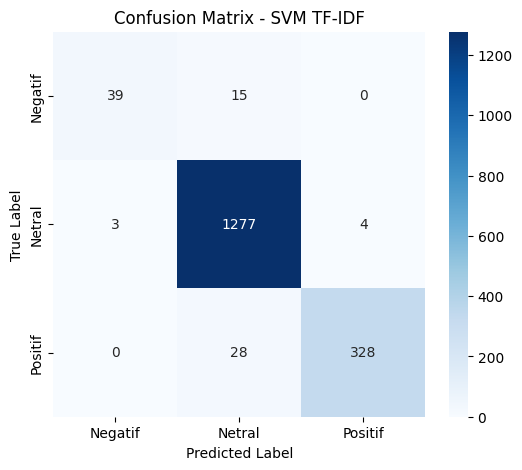

In [48]:
# Confosuion Matrix

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Negatif', 'Netral', 'Positif'],
    yticklabels=['Negatif', 'Netral', 'Positif']
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM TF-IDF")
plt.show()


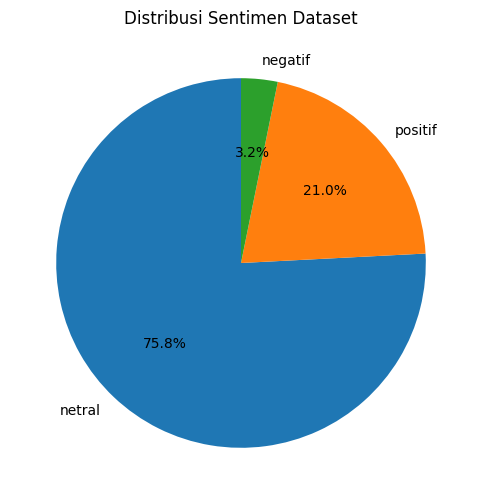

In [49]:
# Pie Chart

df['sentiment'].value_counts().plot.pie(
    autopct='%1.1f%%',
    figsize=(6,6),
    startangle=90
)
plt.title("Distribusi Sentimen Dataset")
plt.ylabel("")
plt.show()


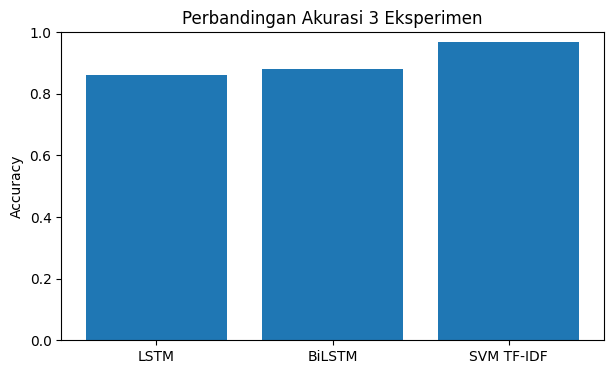

In [50]:
# Akurasi Grafik

import matplotlib.pyplot as plt

experiments = ['LSTM', 'BiLSTM', 'SVM TF-IDF']
accuracies = [0.86, 0.88, 0.97]  # sesuaikan dengan hasilmu

plt.figure(figsize=(7,4))
plt.bar(experiments, accuracies)
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("Perbandingan Akurasi 3 Eksperimen")
plt.show()


In [52]:
# Inference

def predict_sentiment(text):
    text_clean = text.lower()
    text_tfidf = tfidf.transform([text_clean])
    pred = svm_model.predict(text_tfidf)[0]
    return ['negatif', 'netral', 'positif'][pred]

# contoh uji
print(predict_sentiment("videonya keren banget, gua suka"))
print(predict_sentiment("biasa aja sih, netral"))
print(predict_sentiment("jelek banget, buang waktu"))


positif
netral
netral


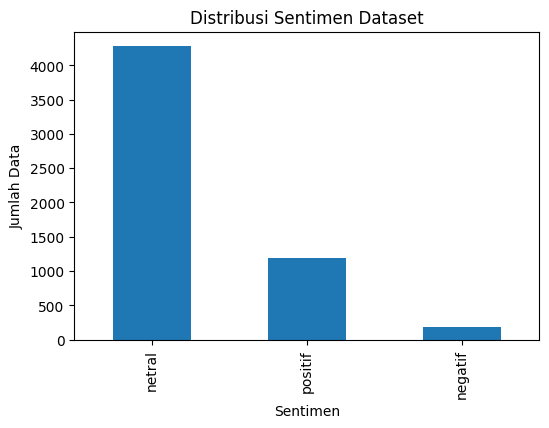

In [56]:
#BAR CHART DATA SENTIMEN
import matplotlib.pyplot as plt

df['sentiment'].value_counts().plot(
    kind='bar',
    figsize=(6,4)
)
plt.title("Distribusi Sentimen Dataset")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Data")
plt.show()


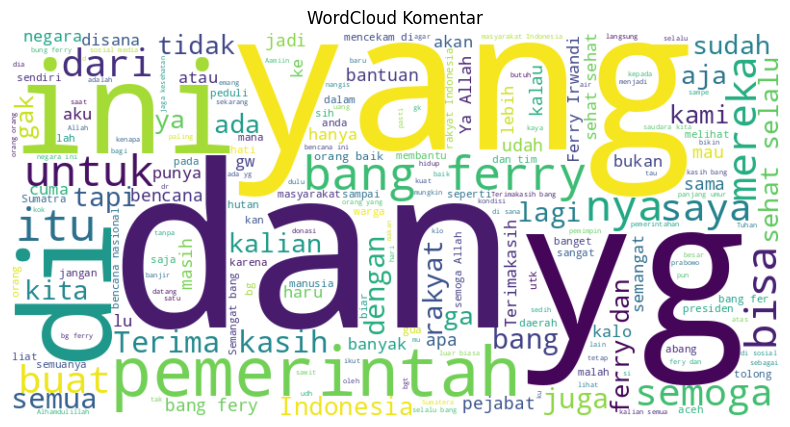

In [58]:
#World Cloud

from wordcloud import WordCloud

text_all = " ".join(df['clean_comment'])

wc = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(text_all)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud Komentar")
plt.show()


In [60]:
#Arsitektur model

model_bilstm.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ (None, 100, 128)       │     1,319,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 256)            │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,750,475 (18.12 MB)

 Trainable params: 1,583,491 (6.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,166,984 (12.08 MB)

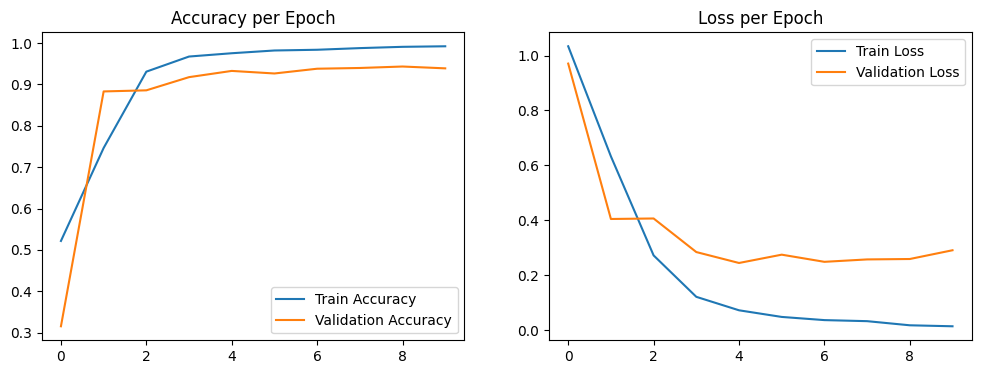

In [62]:
#grafik training

plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history_bilstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_bilstm.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy per Epoch')

# Loss
plt.subplot(1,2,2)
plt.plot(history_bilstm.history['loss'], label='Train Loss')
plt.plot(history_bilstm.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss per Epoch')

plt.show()


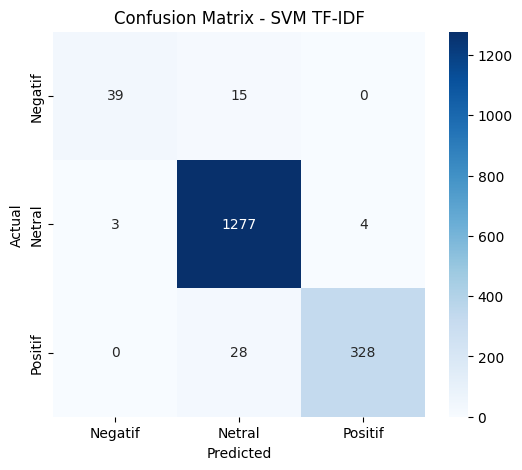

In [64]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Negatif', 'Netral', 'Positif'],
    yticklabels=['Negatif', 'Netral', 'Positif']
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM TF-IDF")
plt.show()



In [65]:
print(predict_sentiment("videonya keren banget, gua suka"))
print(predict_sentiment("biasa aja sih"))
print(predict_sentiment("jelek banget, buang waktu"))


positif
netral
netral
